<a href="https://colab.research.google.com/github/Yoon-jeongwoo/repository/blob/main/%EB%B6%88%EB%9F%89%ED%8C%90%EC%A0%95_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
from PIL import Image
import numpy as np
import glob

e = glob.glob('/content/drive/MyDrive/mvtec_anomaly_detection/bottle/train /*.png')
a=  glob.glob('/content/drive/MyDrive/mvtec_anomaly_detection/bottle/test/broken_large/*.png')
b=  glob.glob('/content/drive/MyDrive/mvtec_anomaly_detection/bottle/test/broken_small/*.png')
c= glob.glob('/content/drive/MyDrive/mvtec_anomaly_detection/bottle/test/contamination/*.png')
d= glob.glob('/content/drive/MyDrive/mvtec_anomaly_detection/bottle/test/good/*.png')

data_bottle_train = a+b+c
data_bottle_good = d + e


In [36]:


x = []
y = []

# train good 데이터 처리
for file_path in data_bottle_good:
    img = Image.open(file_path)
    img = img.resize((224, 224))
    img = img.convert("RGB")
    img = np.array(img) / 255.0
    x.append(img)
    y.append(0)  # 정상

# train bad 데이터 처리
for file_path in data_bottle_train:
    img = Image.open(file_path)
    img = img.resize((224, 224))
    img = img.convert("RGB")
    img = np.array(img) / 255.0
    x.append(img)
    y.append(1)  # 정상

# # test 데이터 처리
# for category, files in data_bottle_test.items():
#     is_defective = (category != 'good')  # 불량 이미지인 경우 True, 정상 이미지인 경우 False
#     for file_path in files:
#         img = Image.open(file_path)
#         img = img.resize((224, 224))
#         img = img.convert("RGB")
#         img = np.array(img) / 255.0
#         x.append(img)
#         y.append(1 if is_defective else 0)  # 불량인 경우 1, 정상인 경우 0

x = np.array(x)
y = np.array(y)

In [37]:
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
print(x)
print(y)

[[[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]


 [[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1

In [39]:
#학습 모델
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 모델 구성
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # 불량 여부를 이진 분류로 출력 (0 또는 1)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 모델 학습
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Epoch 1/10
5/5 [==============================] - 3s 180ms/step - loss: 2.8496 - accuracy: 0.7576 - val_loss: 0.5509 - val_accuracy: 0.7647
Epoch 2/10
5/5 [==============================] - 0s 56ms/step - loss: 0.5709 - accuracy: 0.7576 - val_loss: 0.5362 - val_accuracy: 0.7647
Epoch 3/10
5/5 [==============================] - 0s 57ms/step - loss: 0.6532 - accuracy: 0.7576 - val_loss: 0.5901 - val_accuracy: 0.7647
Epoch 4/10
5/5 [==============================] - 0s 57ms/step - loss: 0.6048 - accuracy: 0.7576 - val_loss: 0.5455 - val_accuracy: 0.7647
Epoch 5/10
5/5 [==============================] - 0s 49ms/step - loss: 0.5997 - accuracy: 0.7576 - val_loss: 0.6021 - val_accuracy: 0.7647
Epoch 6/10
5/5 [==============================] - 0s 49ms/step - loss: 0.6283 - accuracy: 0.7576 - val_loss: 0.5279 - val_accuracy: 0.7647
Epoch 7/10
5/5 [==============================] - 0s 49ms/step - loss: 0.6043 - accuracy: 0.7576 - val_loss: 0.5623 - val_accuracy: 0.7647
Epoch 8/10
5/5 [==========

Epoch 1/10
5/5 [==============================] - 0s 74ms/step - loss: 0.4951 - accuracy: 0.7576 - val_loss: 0.4092 - val_accuracy: 0.7647
Epoch 2/10
5/5 [==============================] - 0s 53ms/step - loss: 0.4348 - accuracy: 0.7576 - val_loss: 0.5315 - val_accuracy: 0.7647
Epoch 3/10
5/5 [==============================] - 0s 47ms/step - loss: 0.4607 - accuracy: 0.7576 - val_loss: 0.4026 - val_accuracy: 0.7647
Epoch 4/10
5/5 [==============================] - 0s 47ms/step - loss: 0.3812 - accuracy: 0.7576 - val_loss: 0.3311 - val_accuracy: 0.7647
Epoch 5/10
5/5 [==============================] - 0s 56ms/step - loss: 0.3071 - accuracy: 0.7576 - val_loss: 0.2631 - val_accuracy: 0.7647
Epoch 6/10
5/5 [==============================] - 0s 48ms/step - loss: 0.2645 - accuracy: 0.7576 - val_loss: 0.5855 - val_accuracy: 0.7647
Epoch 7/10
5/5 [==============================] - 0s 46ms/step - loss: 0.4806 - accuracy: 0.7576 - val_loss: 0.3678 - val_accuracy: 0.7647
Epoch 8/10
5/5 [===========

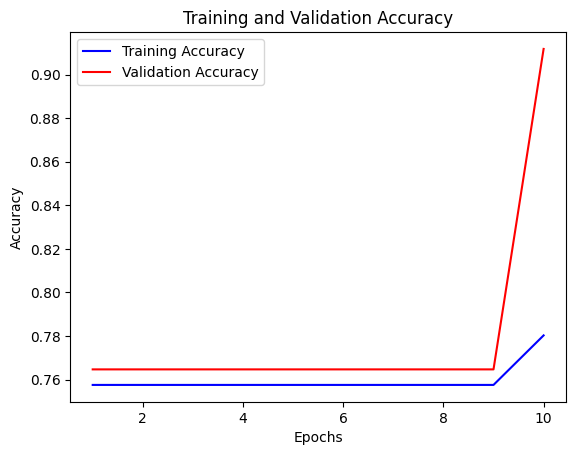

2/2 [==============================] - 0s 12ms/step - loss: 0.3051 - accuracy: 0.9118
Test Loss: 0.30510208010673523
Test Accuracy: 91.18%


In [41]:
import matplotlib.pyplot as plt

# 모델 학습
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# 학습 과정에서의 정확도 그래프 표시
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 최종 테스트 정확도 출력
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy: {:.2f}%'.format(test_accuracy * 100))


1/1 [==============================] - 0s 19ms/step
불량품입니다.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


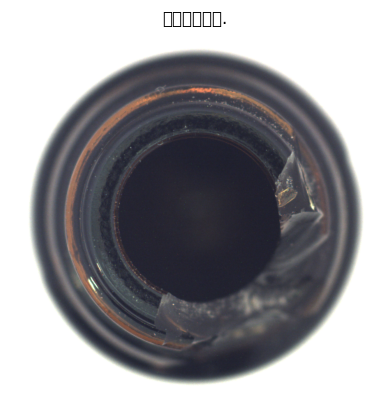

In [43]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 이미지 로드 및 전처리 함수
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))
    img = img.convert("RGB")
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# 실제 사진 경로
image_path = '/content/drive/MyDrive/mvtec_anomaly_detection/bottle/test/broken_large/000.png'

# 이미지 전처리
image = preprocess_image(image_path)

# 모델 예측
predictions = model.predict(image)
is_defective = predictions[0][0] > 0.5  # 불량 여부를 0.5 기준으로 이진 분류

# 이미지 출력
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')

# 결과 출력
if is_defective:
    result = '불량품입니다.'
else:
    result = '정상제품입니다.'

print(result)
plt.title(result)
plt.show()
